In [71]:
import glob
import pandas as pd
import csv
import os

def get_model_config(name, file):
    msd, encoder, enriched, embs, size = name.split("-")
    return {"MSD": msd, "Encoder": encoder, "Embedder": embs, "Size": size, "Corpus": os.path.basename(file).split(".")[0]}
    
merged_files = []
for file in glob.glob("csv_dumps/*.csv"):
    with open(file) as f:
        r = csv.DictReader(f)
        for row in r:
            merged_files.append({**get_model_config(row["name"], file), **row})
        columns = r.fieldnames
          

In [72]:
df = pd.DataFrame(merged_files)

In [73]:
from IPython.core.display import display, HTML

for col in ["precision-positive", "fscore-positive", "recall-positive"]:
    df[col] = df[col].astype(float)

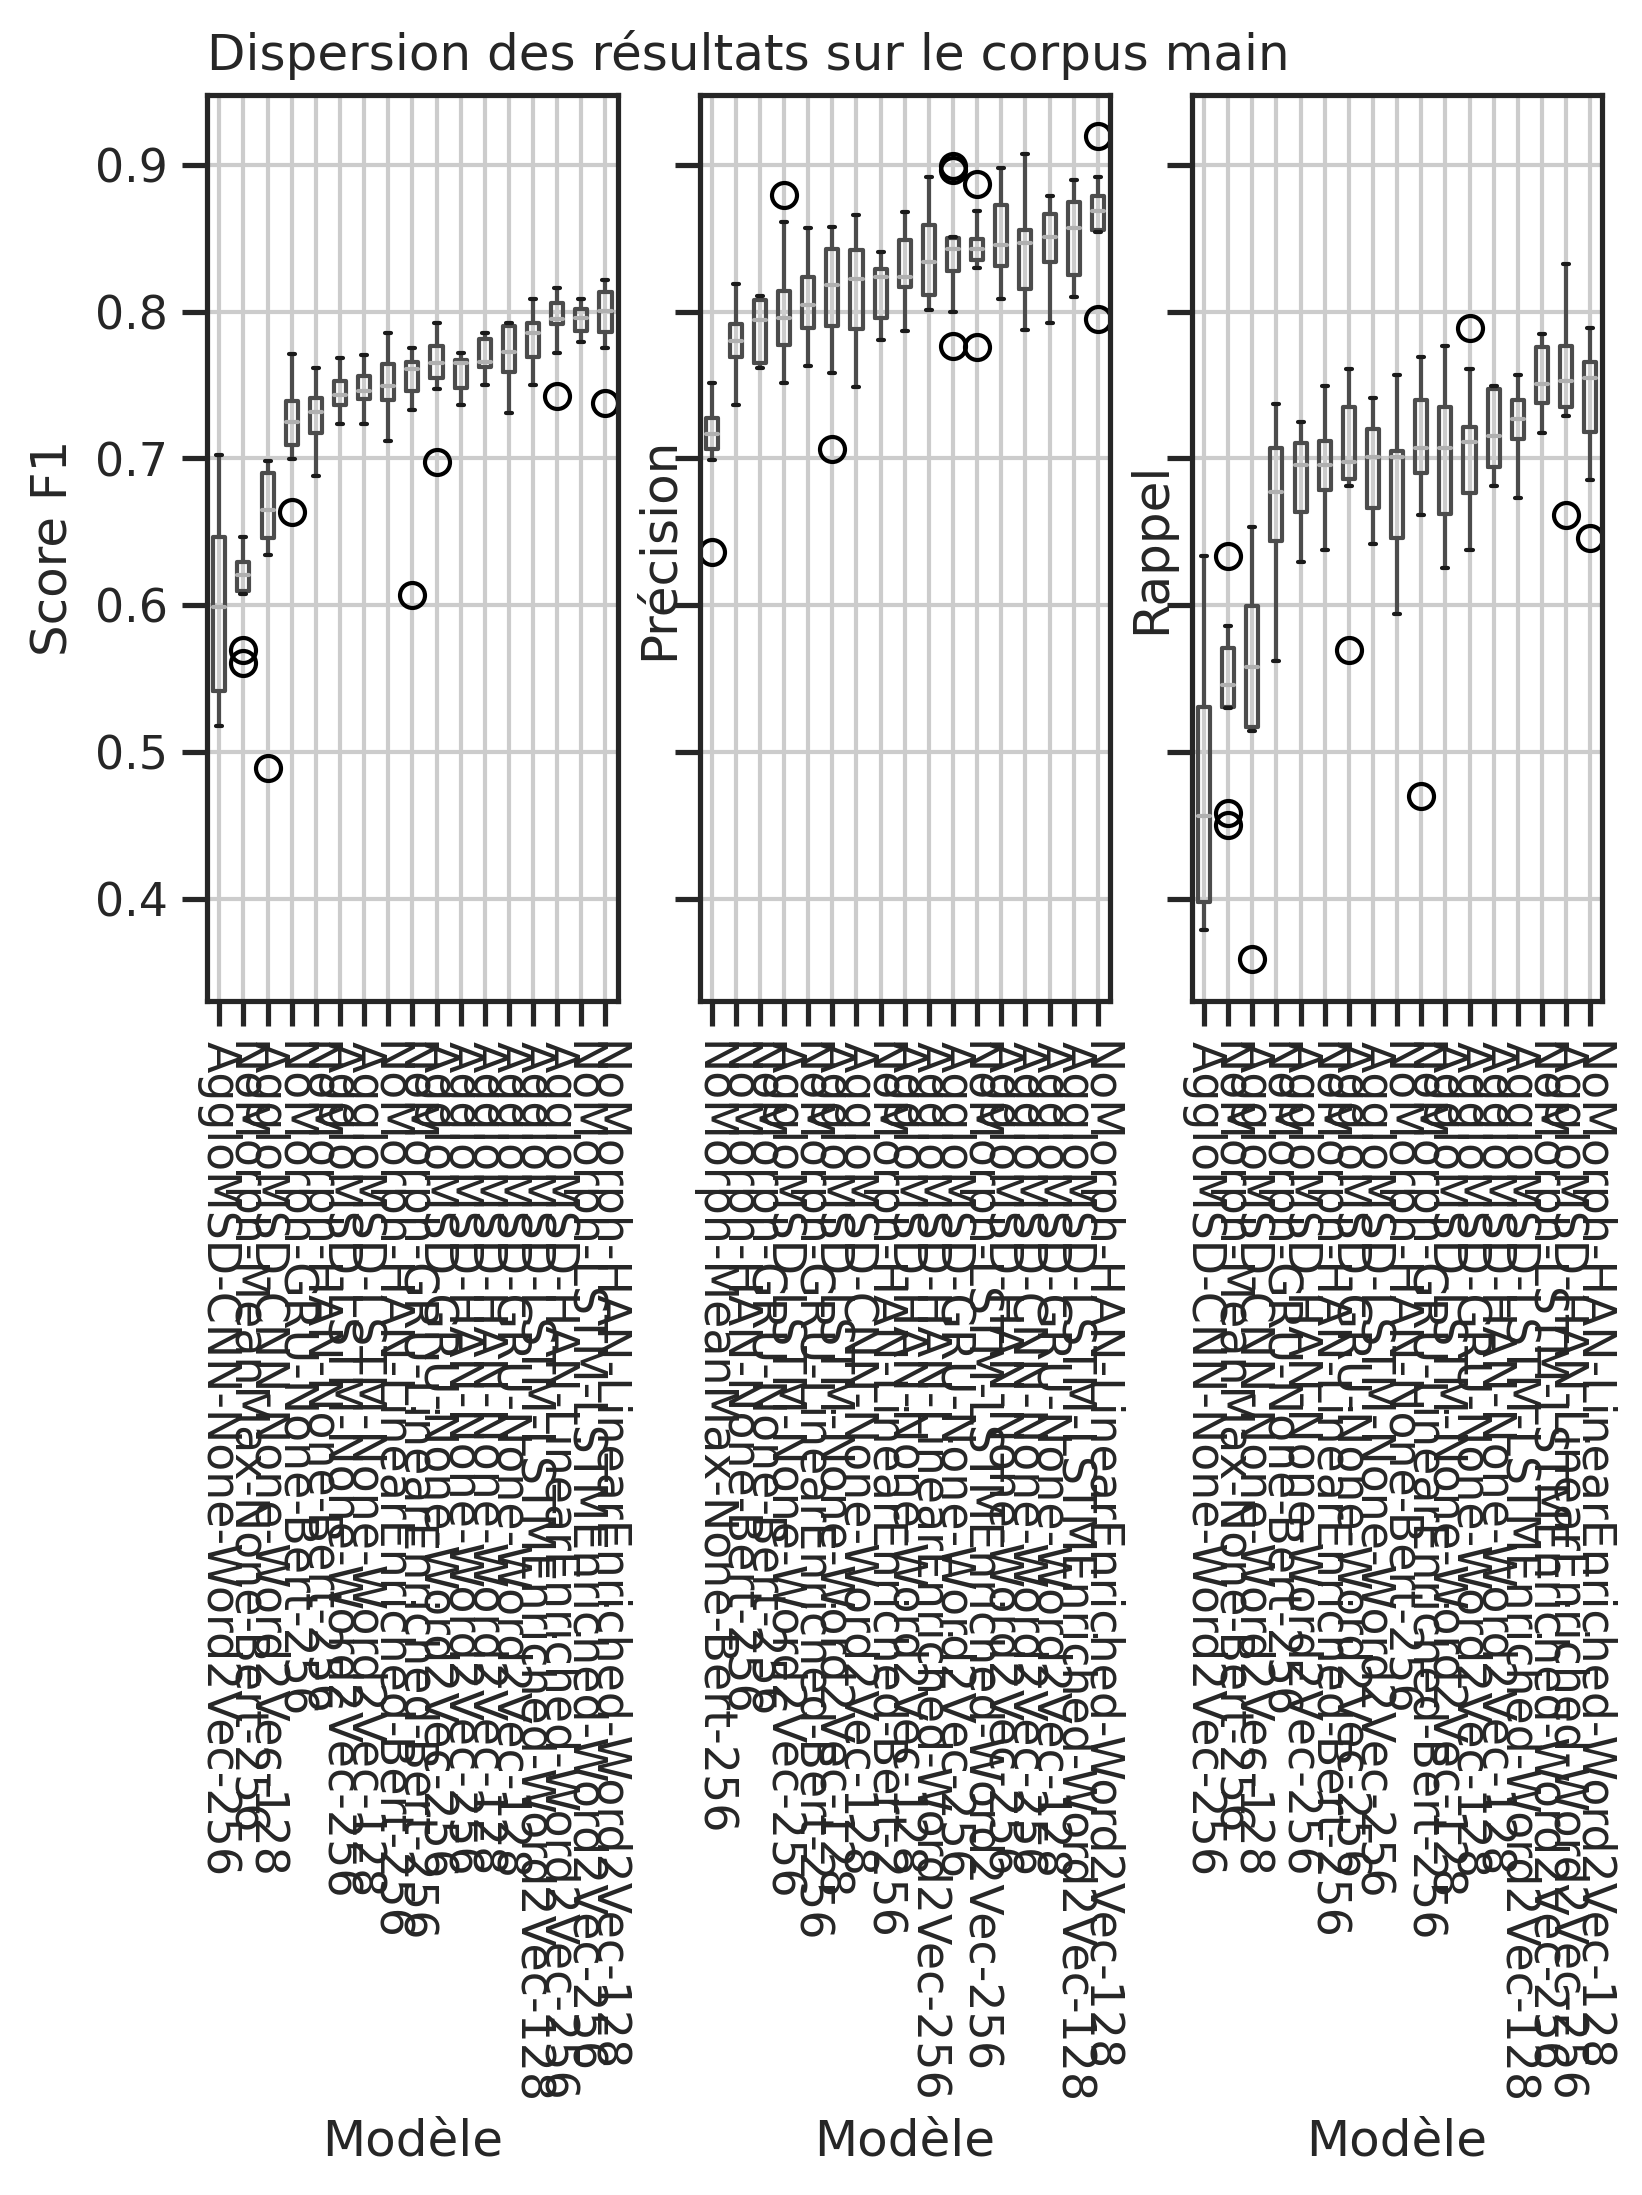

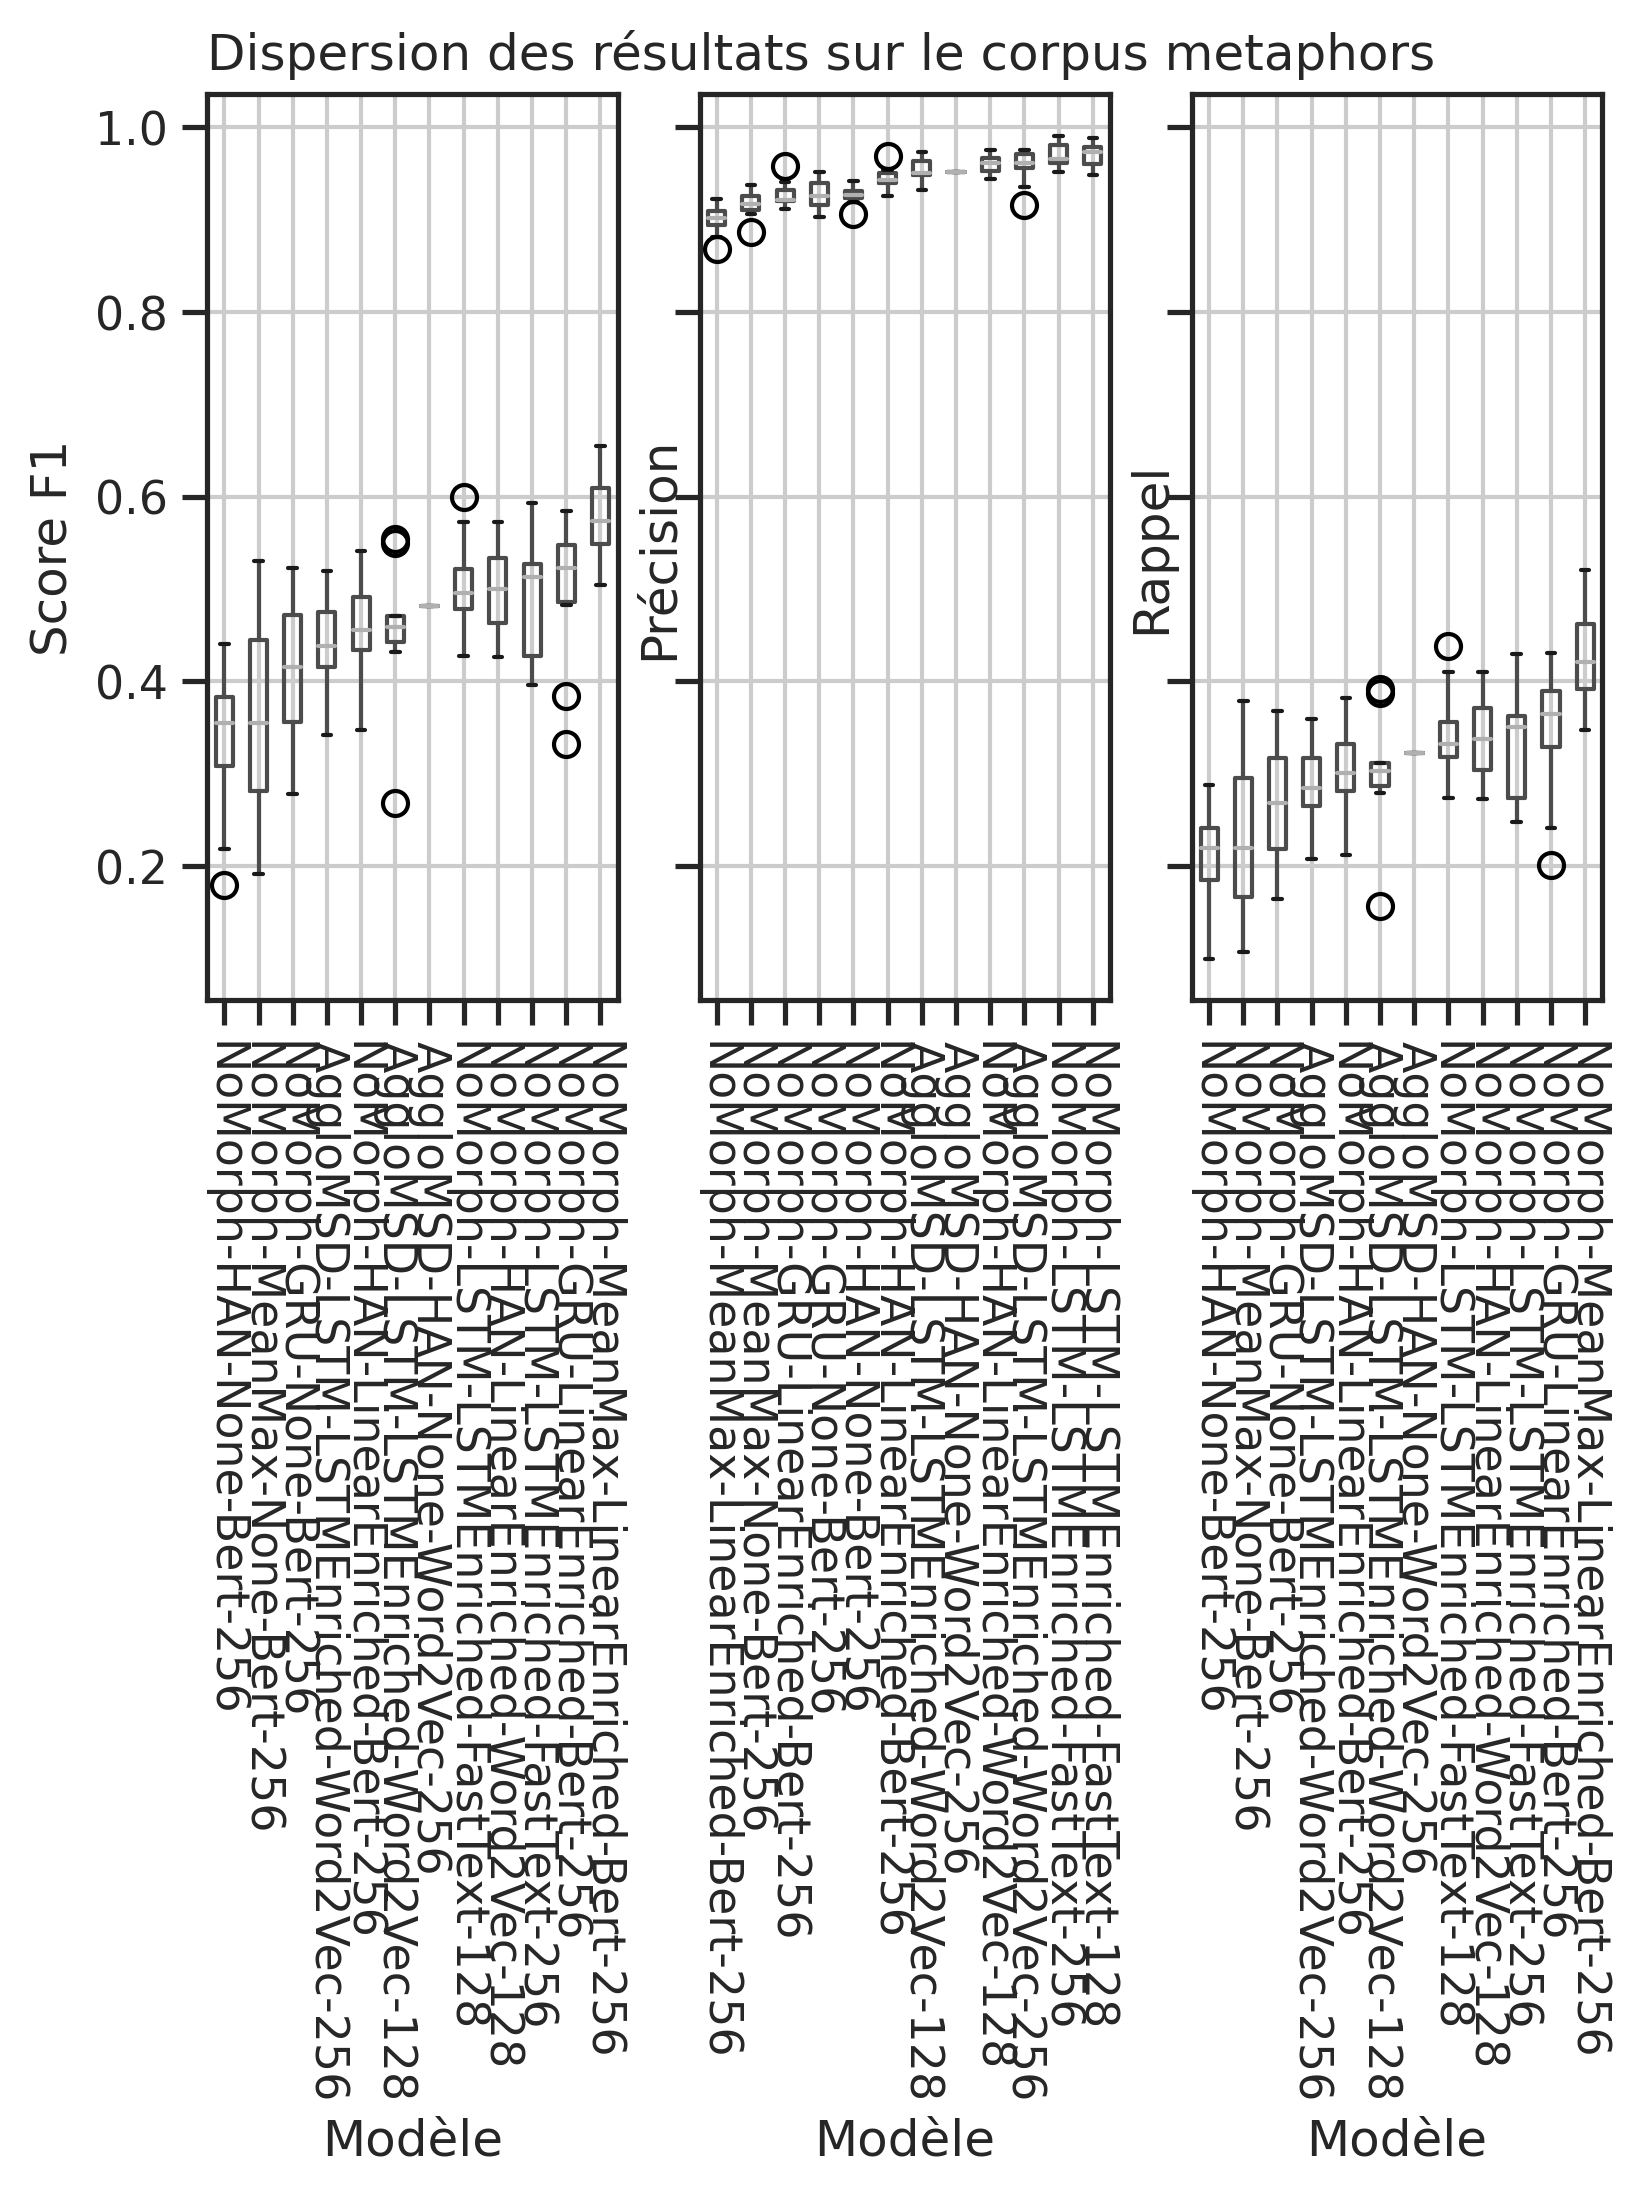

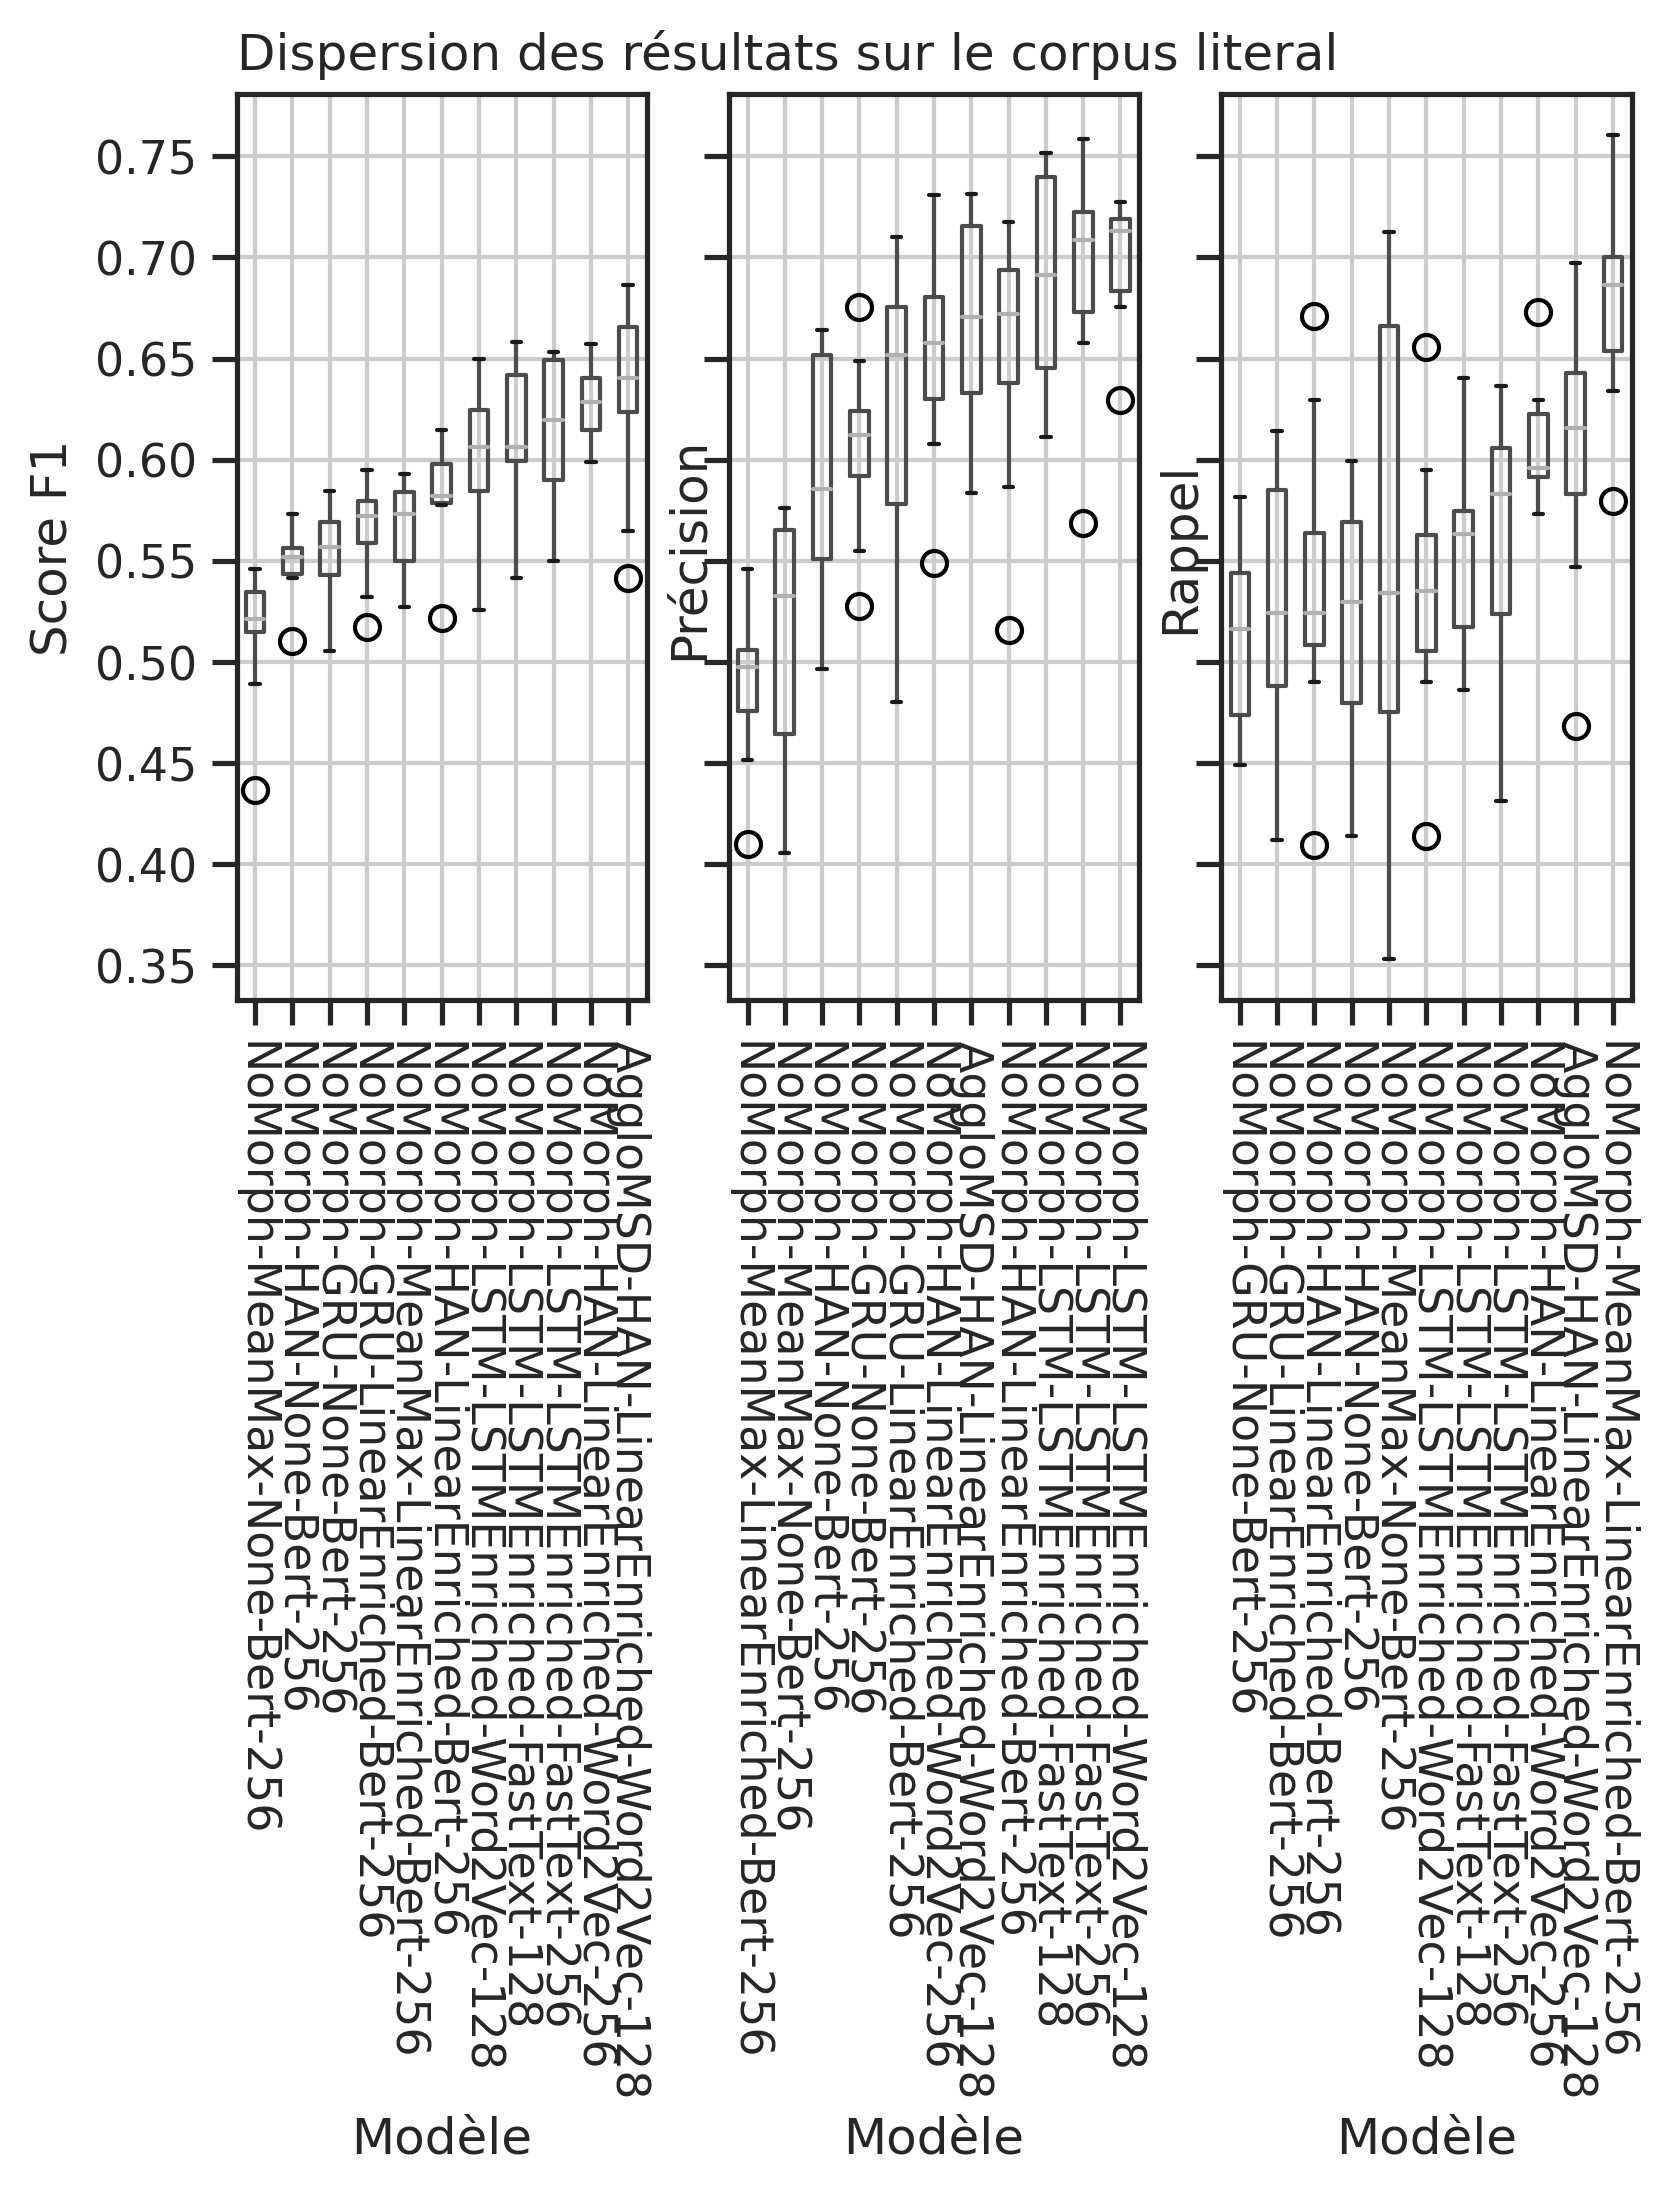

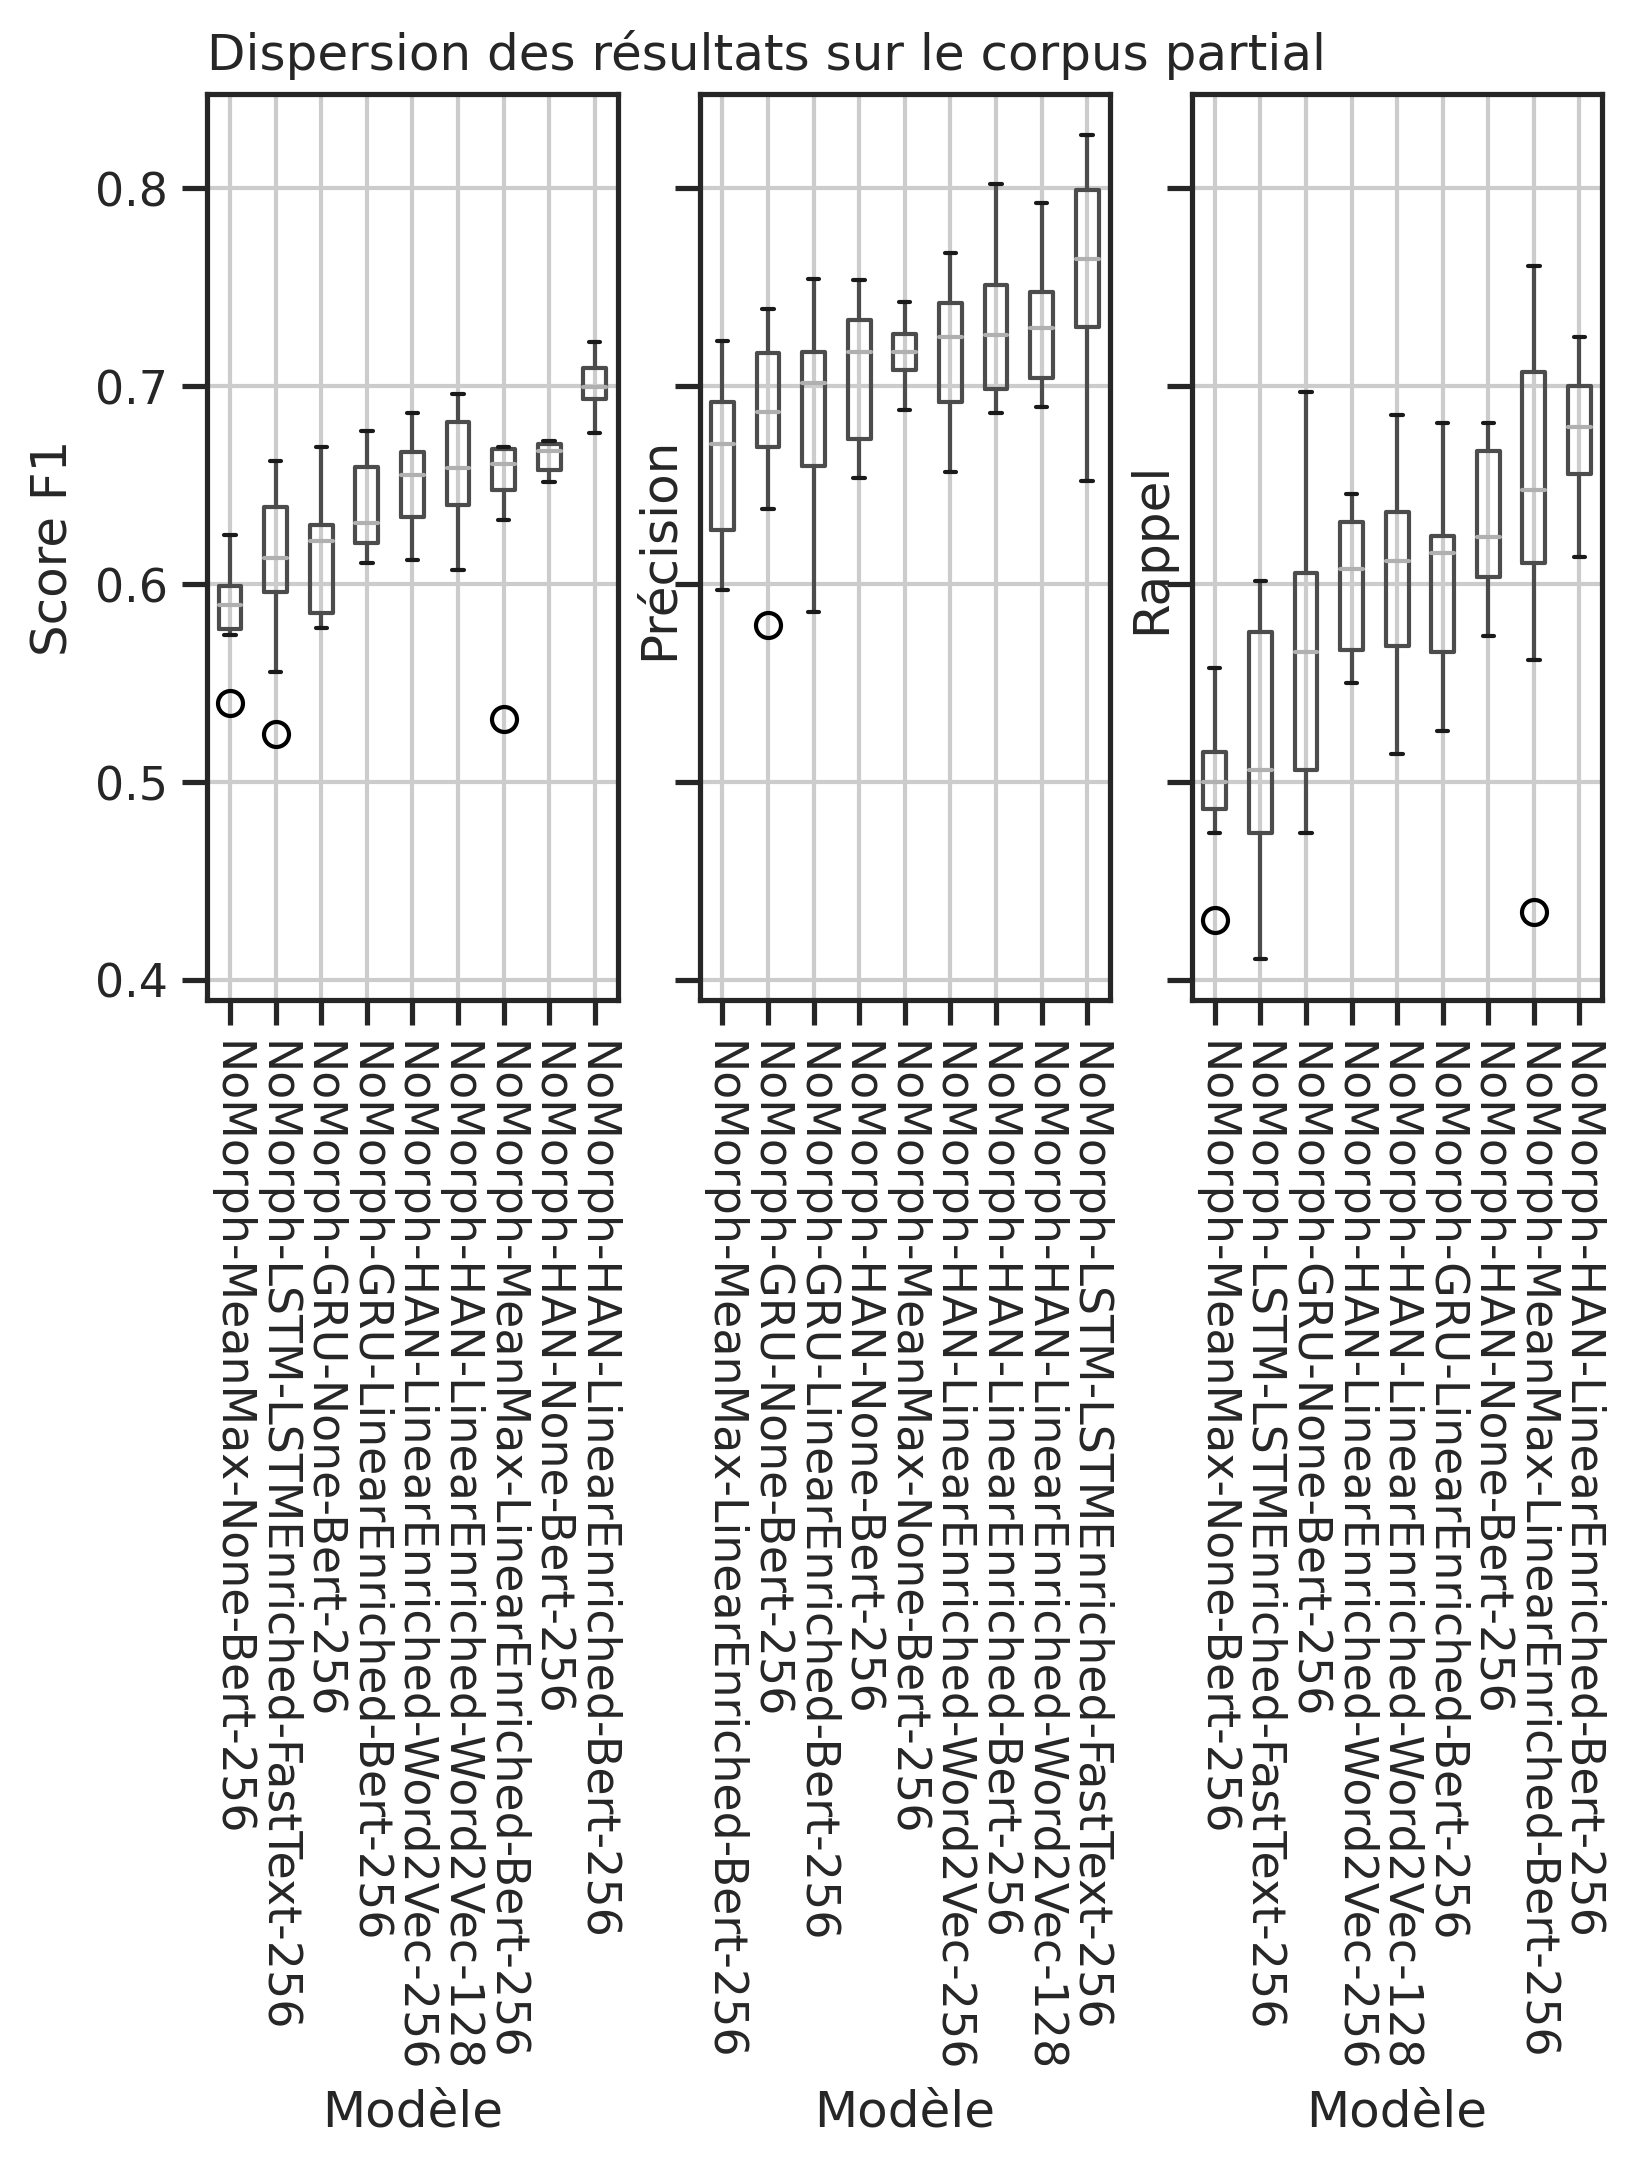

In [74]:
import matplotlib.pyplot as plt

def boxplot_sorted(df, by, column, rot=0, ax=None):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes", ax=ax)


def plot_show(_df, key, legend, _corpus):
    fig, axes = plt.subplots(ncols=3, nrows=1, dpi=300, sharey=True)
    
    i = 0
    for ax, (legend, key) in zip(axes, [
        ("Score F1", "fscore-positive"),
        ("Précision", "precision-positive"),
        ("Rappel", "recall-positive"),
    ]):
        if i == 0:
            ax.set_title(f'Dispersion des résultats sur le corpus {_corpus}', loc="left")
            i = 1
        axes = boxplot_sorted(
            df=_df[_df.Corpus == _corpus], by="name", column=key, ax=ax
        )
        ax.set_xlabel('Modèle')
        ax.set_ylabel(legend)
        #plt.suptitle('')
        ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=-90) 
    plt.show()
    
for corpus in list(df.Corpus.unique()):
    #display(HTML(f"<h2>Results for {corpus}</h2>"))
    #display(HTML(
    #    df[df.Corpus == corpus].groupby(df.name)[
    #        ["precision-positive", "fscore-positive", "recall-positive"]
    #    ].describe().transpose().to_html()
    #))
    plot_show(
        _df=df,
        _corpus=corpus,
        key="precision-positive",
        legend="Précision(Positive)"
    )

## Results per "kind" of model



/home/thibault/dev/est-lascivuum-non-est/env/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/thibault/dev/est-lascivuum-non-est/env/lib/python3.8/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Valeur (en %)             \
                                                          count       mean   
Architecture          Score en catégorie positive                            
Bert                  Précision                            55.0  78.073486   
                      Rappel                               55.0  65.918146   
                      Score F1                             55.0  71.237714   
CNN sans métadonnées  Précision                            20.0  82.704710   
                      Rappel                               20.0  51.115538   
                      Score F1                             20.0  62.582203   
GRU sans métadonnées  Précision                            20.0  84.475801   
                      Rappel                               20.0  70.179283   
                      Score F1                             20.0  76.486254   
HAN sans métadonnées  Précision                            20.0  84.076129   
                      Rappel                               20.0  70.159363   
                      Score F1                             20.0  76.376325   
LSTM sans métadonnées Précision                            20.0  80.468259   
                      Rappel                               20.0  69.840638   
                      Score F1                             20.0  74.574409   
Top 5                 Précision                            40.0  84.977357   
                      Rappel                               40.0  74.213148   
                      Score F1                             40.0  79.120634   

                                                                        \
                                                        std        min   
Architecture          Score en catégorie positive                        
Bert                  Précision                    4.301660  63.599998   
                      Rappel                       7.831505  45.019922   
                      Score F1                     5.644671  56.079406   
CNN sans métadonnées  Précision                    3.821283  74.885845   
                      Rappel                       9.158422  35.856575   
                      Score F1                     6.689476  48.913044   
GRU sans métadonnées  Précision                    3.170520  77.642274   
                      Rappel                       4.956371  56.972110   
                      Score F1                     2.465513  69.756097   
HAN sans métadonnées  Précision                    2.910500  78.661090   
                      Rappel                       3.458523  62.948209   
                      Score F1                     1.393836  73.660713   
LSTM sans métadonnées Précision                    4.310440  70.652175   
                      Rappel                       4.118309  62.549800   
                      Score F1                     1.394842  72.331154   
Top 5                 Précision                    3.188550  77.559054   
                      Rappel                       3.759086  64.541835   
                      Score F1                     1.971532  73.804098   

                                                                         \
                                                         25%        50%   
Architecture          Score en catégorie positive                         
Bert                  Précision                    76.247850  78.475338   
                      Rappel                       62.948206  68.924302   
                      Score F1                     69.712090  73.289180   
CNN sans métadonnées  Précision                    80.178516  82.861304   
                      Rappel                       42.729085  51.992032   
                      Score F1                     57.783785  64.682433   
GRU sans métadonnées  Précision                    82.935147  84.746718   
                      Rappel                       68.426296  70.119524   
                      Score F1 

<Figure size 1800x1200 with 0 Axes>

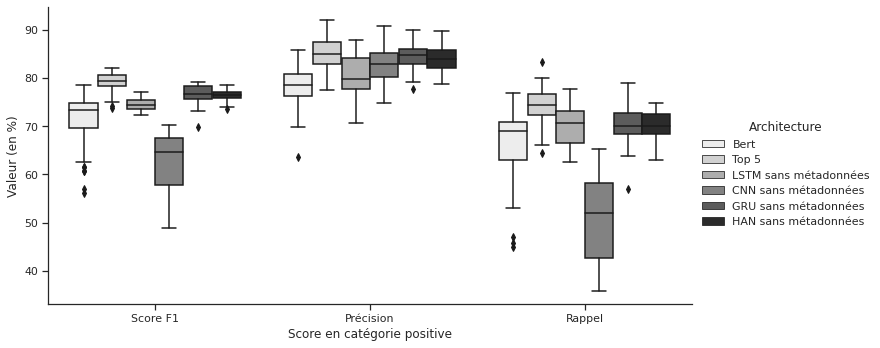

In [75]:
import seaborn as sns

cols = ["fscore-positive", "precision-positive", "recall-positive"]
newdf = []
for idx, row  in df[df.Corpus == "main"].iterrows():
    for col, buty in [
        ("fscore-positive", "Score F1"),
        ("precision-positive", "Précision"),
        ("recall-positive", "Rappel")]:
        newdf.append({
            "Valeur (en %)": row[col]*100,
            "Score en catégorie positive": buty,
            "Architecture": "Bert" if row.Embedder == "Bert" else "Top 5" if "Enriched" in row["name"] else f"{row.Encoder} sans métadonnées"
        })

import matplotlib.pyplot as plt

fig = plt.figure(dpi=300)

sns.set(style="ticks")

g = sns.factorplot(
    data=pd.DataFrame(newdf),
    hue="Architecture", 
    x="Score en catégorie positive",
    y="Valeur (en %)",
    kind='box',
    palette="Greys",
    size = 5,
    aspect = 2,
    legend_out = True
)
pd.DataFrame(newdf).groupby(["Architecture", "Score en catégorie positive"]).describe()

/home/thibault/dev/est-lascivuum-non-est/env/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/thibault/dev/est-lascivuum-non-est/env/lib/python3.8/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Valeur (en %)             \
                                                         count       mean   
Dimension d'encodage Score en catégorie positive                            
128                  Précision                            40.0  82.472405   
                     Rappel                               40.0  66.832670   
                     Score F1                             40.0  73.435093   
256                  Précision                            40.0  83.390046   
                     Rappel                               40.0  63.814742   
                     Score F1                             40.0  71.574503   

                                                                        \
                                                        std        min   
Dimension d'encodage Score en catégorie positive                         
128                  Précision                     3.742729  70.652175   
                     Rappel                        8.790327  35.856575   
                     Score F1                      5.915873  48.913044   
256                  Précision                     3.972751  75.103736   
                     Rappel                       11.092774  37.848607   
                     Score F1                      7.641160  51.771116   

                                                                        \
                                                        25%        50%   
Dimension d'encodage Score en catégorie positive                         
128                  Précision                    80.628178  82.944620   
                     Rappel                       63.446216  69.521913   
                     Score F1                     71.717626  75.053304   
256                  Précision                    79.957083  83.894345   
                     Rappel                       61.752990  68.326694   
                     Score F1                     70.088029  74.581441   

                                                                        
                                                        75%        max  
Dimension d'encodage Score en catégorie positive                        
128                  Précision                    85.133506  87.864077  
                     Rappel                       72.908366  78.884465  
                     Score F1                     76.813315  79.253107  
256                  Précision                    85.749130  90.756303  
                     Rappel                       71.314740  76.095617  
                     Score F1                     76.547150  79.237288

<Figure size 1800x1200 with 0 Axes>

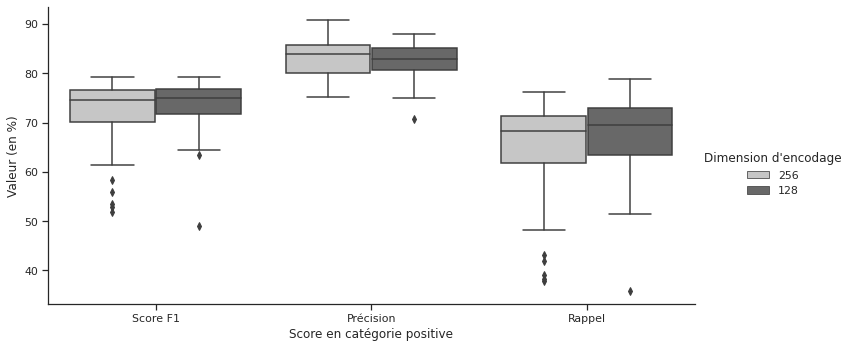

In [76]:
import seaborn as sns

cols = ["fscore-positive", "precision-positive", "recall-positive"]
newdf = []
for idx, row  in df[df.Corpus == "main"].iterrows():
    if "Enriched" in row["name"] or "Bert" in row["name"]:
        continue
    for col, buty in [
        ("fscore-positive", "Score F1"),
        ("precision-positive", "Précision"),
        ("recall-positive", "Rappel")]:
        newdf.append({
            "Valeur (en %)": row[col]*100,
            "Score en catégorie positive": buty,
            "Dimension d'encodage": "128" if "128" in row["name"] else f"256"
        })

import matplotlib.pyplot as plt

fig = plt.figure(dpi=300)

sns.set(style="ticks")

g = sns.factorplot(
    data=pd.DataFrame(newdf),
    hue="Dimension d'encodage", 
    x="Score en catégorie positive",
    y="Valeur (en %)",
    kind='box',
    palette="Greys",
    size = 5,
    aspect = 2,
    legend_out = True
)
pd.DataFrame(newdf).groupby(["Dimension d'encodage", "Score en catégorie positive"]).describe()